In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [113]:
df = pd.read_csv('D:\Kaggle\dataset\House_Rent_Dataset\House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


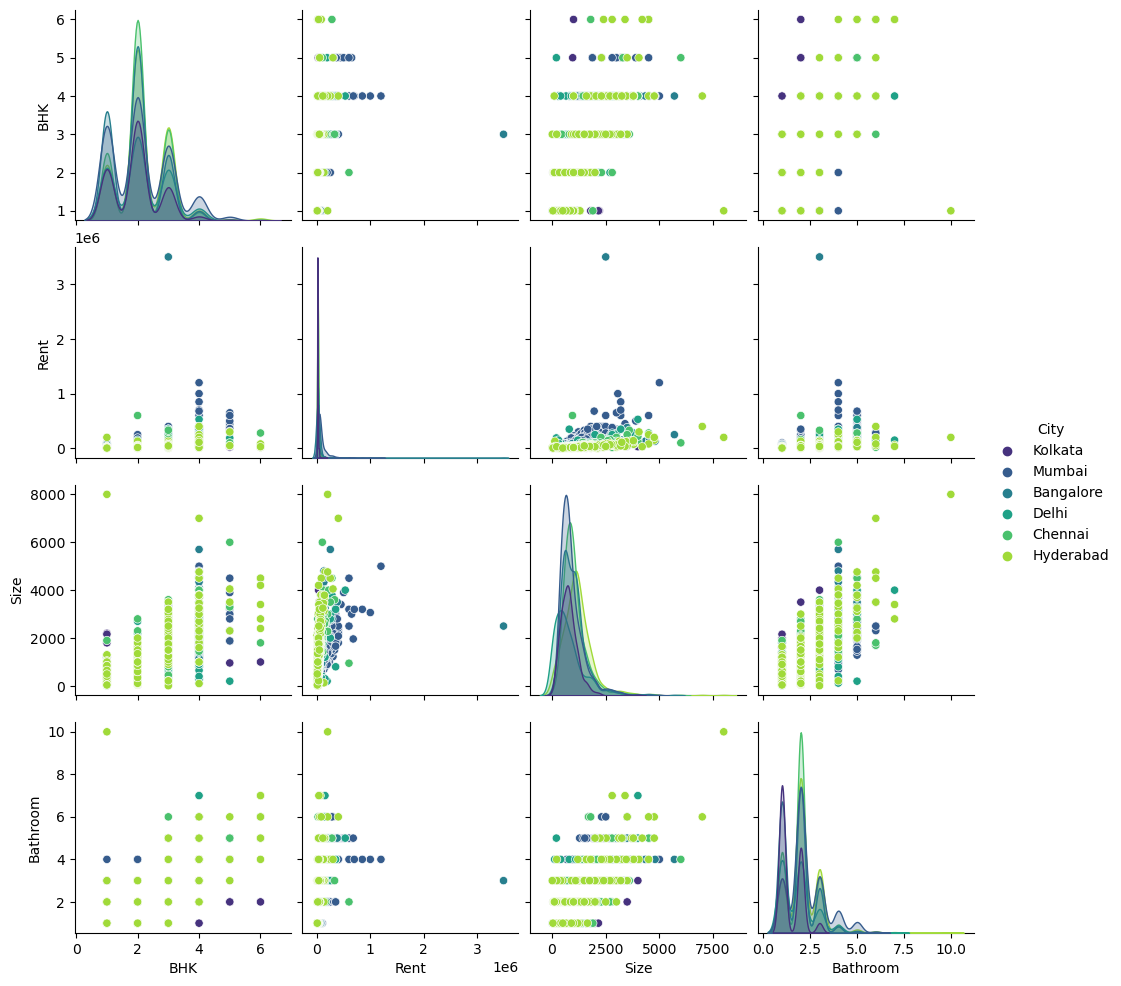

C:\Users\786\AppData\Local\Temp\ipykernel_25928\7308976.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


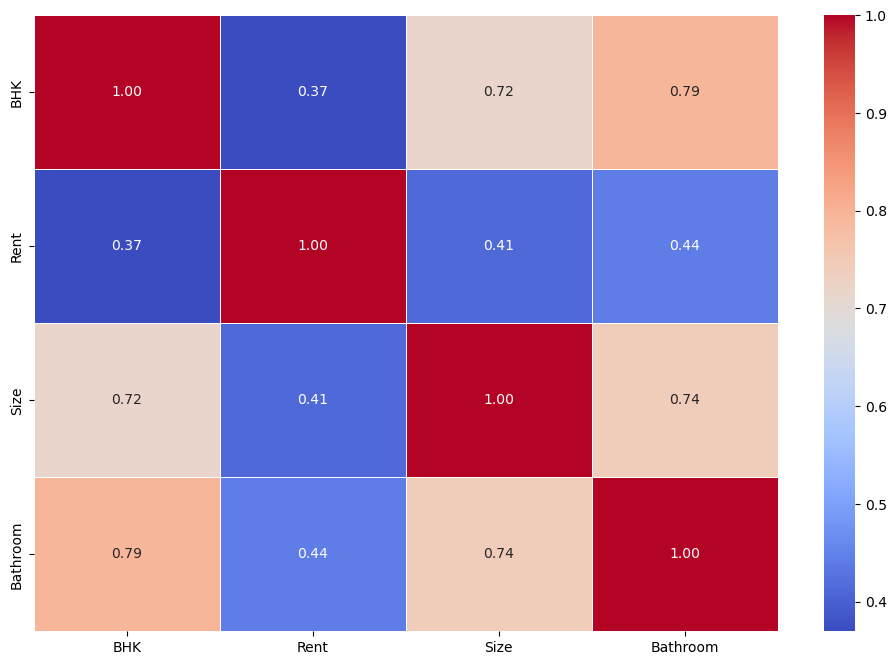

In [114]:
# Assuming your DataFrame is named 'df'
# If not, replace 'df' with the actual name of your DataFrame

# Drop 'Posted On' and 'Point of Contact' columns as they are not likely to be useful for prediction
df = df.drop(['Posted On', 'Point of Contact'], axis=1)

# Display a pairplot to visualize relationships between numerical features
sns.pairplot(df, hue='City', palette='viridis')
plt.show()

# Display a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


In [147]:
df = df[df['Rent']<1000000]
df = df[df['Area Type'] != 'Built Area']
df = df[df['Bathroom'] < 6]

In [148]:
df[df['Bathroom'] < 6]

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2
4742,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3
4743,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3
4744,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2


In [157]:
lablel_enc = LabelEncoder()
df['floor_enc'] = lablel_enc.fit_transform(np.array(df['Floor']).reshape(-1,1))

C:\Users\786\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Floor', y='Rent', data=df)
plt.show()

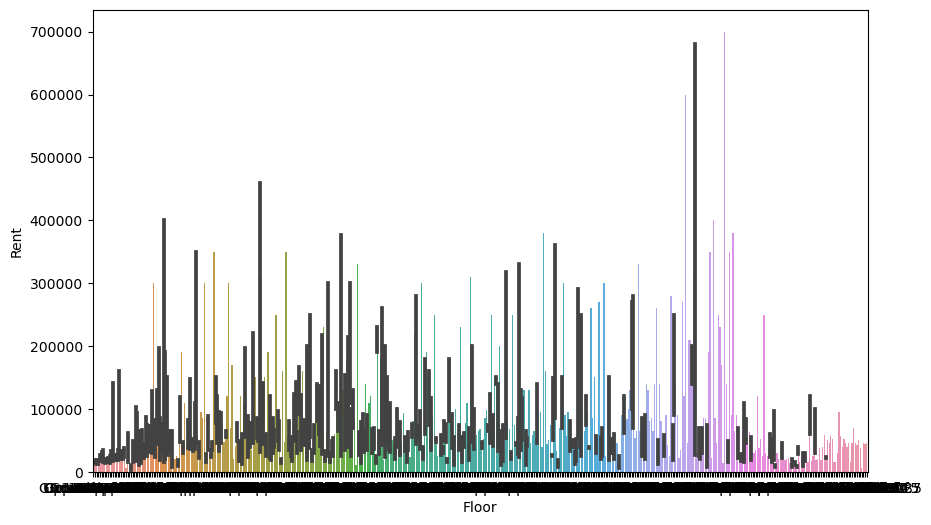

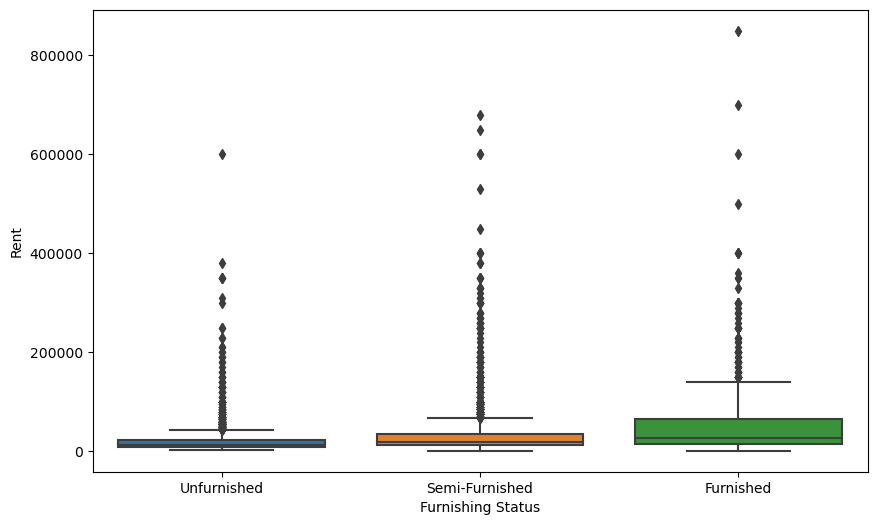

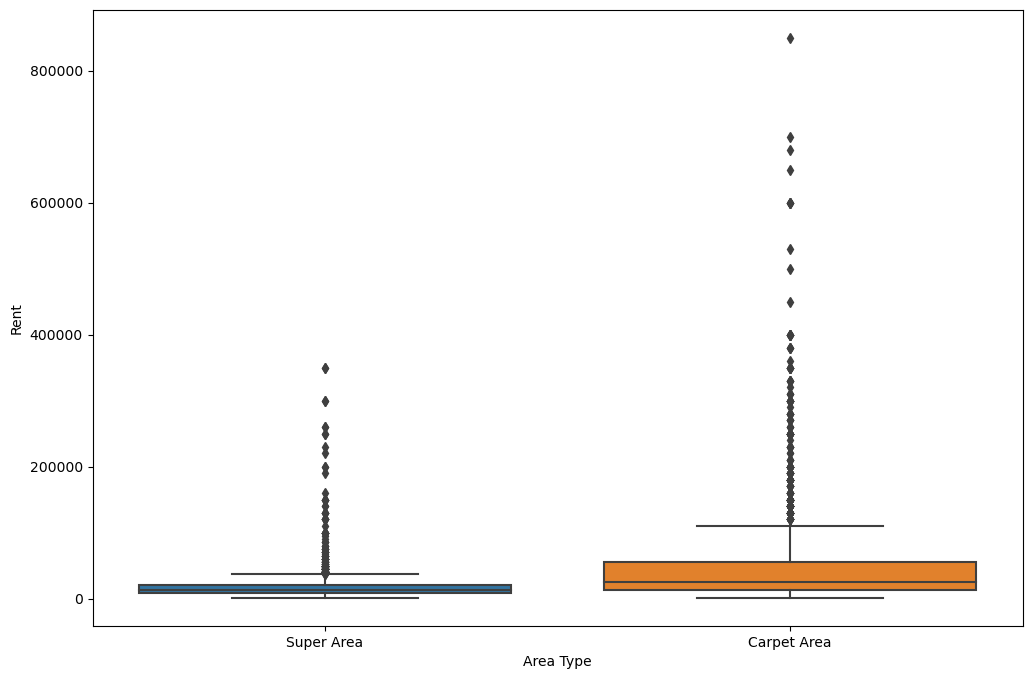

In [150]:
# Boxplot to compare 'Furnishing Status' with 'Rent'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Furnishing Status', y='Rent', data=df)
plt.show()

# Boxplot to compare 'Area Type' with 'Rent'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Area Type', y='Rent', data=df)
plt.show()

In [89]:
X = df.drop(columns=['Posted On','Rent','Floor','Area Locality'])

In [90]:
y = np.array(df['Rent']).reshape(-1,1)
y

array([[10000],
       [20000],
       [17000],
       ...,
       [35000],
       [45000],
       [15000]], dtype=int64)

In [91]:
X.head()

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor_ordenc,Area_Locality_ordenc
0,2,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,455.0,221.0
1,2,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,14.0,1527.0
2,2,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,14.0,1760.0
3,2,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,10.0,526.0
4,2,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,10.0,1890.0


In [48]:
feactures = X.columns

In [93]:
object_columns = X.select_dtypes(include='object').columns
int_columns = X.select_dtypes(include=['int64','float64']).columns
print('Object Type columns are:\n',object_columns := list(object_columns))
print('Int Type columns are:\n',int_columns := list(int_columns))

Object Type columns are:
 ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']
Int Type columns are:
 ['BHK', 'Size', 'Bathroom', 'Floor_ordenc', 'Area_Locality_ordenc']


In [97]:
from sklearn.tree import DecisionTreeRegressor
column_trans = make_column_transformer(
    (OneHotEncoder(), object_columns),(MinMaxScaler(), int_columns))
lr = LinearRegression()
pipe = make_pipeline(column_trans,DecisionTreeRegressor())

In [55]:
# X = column_trans.fit_transform(X)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [99]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Area Type', 'City',
                                                   'Furnishing Status',
                                                   'Tenant Preferred',
                                                   'Point of Contact']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['BHK', 'Size', 'Bathroom',
                                                   'Floor_ordenc',
                                                   'Area_Locality_ordenc'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [100]:
y_pred = pipe.predict(X_test)

In [101]:
feactures = list(feactures)
feactures.append('Predicted')
feactures.append('Actual')
feactures

['BHK',
 'Size',
 'Area Type',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Bathroom',
 'Point of Contact',
 'Floor_ordenc',
 'Area_Locality_ordenc',
 'Predicted',
 'Actual',
 'Predicted',
 'Actual']

In [102]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

40399.76891835945

In [103]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.7251419262888918

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

In [81]:
cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error').mean()

-90018.55797454361

In [82]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [83]:
y_pred = dt_model.predict(X_test)

In [104]:
np.c_[y_pred,y_test]

array([[  13000.,   16000.],
       [   7000.,   12000.],
       [  24000.,   28000.],
       [  45000.,    8000.],
       [  60000.,   46000.],
       [  16000.,   17000.],
       [  53500.,   57000.],
       [   9000.,    9500.],
       [ 230000.,  400000.],
       [  10500.,   15000.],
       [  12500.,   10000.],
       [  15000.,   12000.],
       [  20000.,   27000.],
       [  16000.,   16000.],
       [  20000.,   15000.],
       [  36000.,    8500.],
       [  85000.,  140000.],
       [   8000.,   12000.],
       [  10000.,    6000.],
       [  62000.,   60000.],
       [  50000.,   38000.],
       [  11000.,    7500.],
       [  45000.,   23000.],
       [  14000.,   14000.],
       [ 140000.,  260000.],
       [   7000.,    5000.],
       [   8500.,    6000.],
       [  15000.,   16500.],
       [   9000.,    6500.],
       [  12000.,   15000.],
       [   6000.,    5000.],
       [   5000.,   14000.],
       [  10000.,    5000.],
       [  12000.,   12000.],
       [  2000

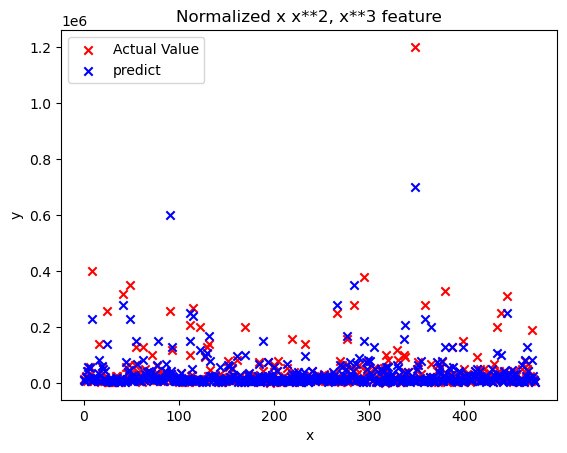

In [105]:
x = range(0,len(y_test))
plt.scatter(x, y_test, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.scatter(x,y_pred,  marker='x',color='b', label = 'predict'); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

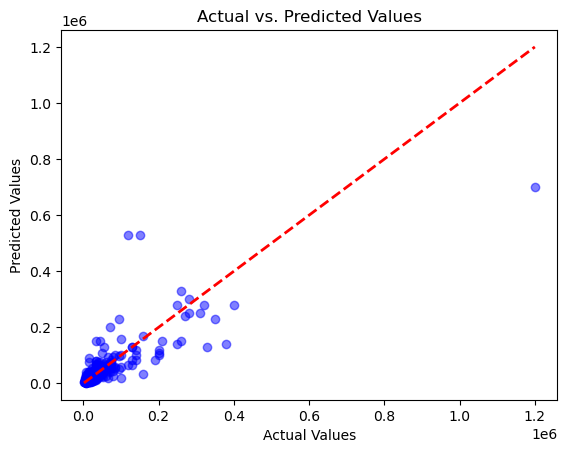

In [86]:
# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred, c='blue', marker='o', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()